In [15]:
import Parameters
import numpy as np
angle_antenna_user=40
a=10**(Parameters.G_BS_max/10)+np.max(np.max([-0.6*(angle_antenna_user/Parameters.bs_threedB)**2,-(Parameters.front_to_back_ratio/10)]))
print(Parameters.G_BS_max/10)
print(-0.6*(angle_antenna_user/Parameters.bs_threedB)**2)
print(-(Parameters.front_to_back_ratio/10))
print(np.max([-0.6*(angle_antenna_user/Parameters.bs_threedB)**2,-(Parameters.front_to_back_ratio/10)]))
print(a)

2.0
-1.0666666666666667
-3.0
-1.0666666666666667
98.93333333333334


In [1]:
import numpy as np

# 常量
R_earth = 6371000  # 地球半径，单位：米

# 输入数据
sate_position = [36.0735, 99.0898, 1134680.0]  # 卫星经纬度和海拔
user1_position = [37.33657329, 97.99781444, 0.0]  # 用户1经纬度和海拔
user2_position = [33.81267259, 98.5768581, 0.0]  # 用户2经纬度和海拔

# 转换为弧度制
def to_radians(coord):
    return [np.radians(coord[0]), np.radians(coord[1]), coord[2]]

sate_position_rad = to_radians(sate_position)
user1_position_rad = to_radians(user1_position)
user2_position_rad = to_radians(user2_position)

# 笛卡尔坐标转换
def spherical_to_cartesian(lat, lon, alt):
    x = (R_earth + alt) * np.cos(lat) * np.cos(lon)
    y = (R_earth + alt) * np.cos(lat) * np.sin(lon)
    z = (R_earth + alt) * np.sin(lat)
    return np.array([x, y, z])

sate_cartesian = spherical_to_cartesian(*sate_position_rad)
user1_cartesian = spherical_to_cartesian(*user1_position_rad)
user2_cartesian = spherical_to_cartesian(*user2_position_rad)

# 计算向量
vec_user1_to_sate = sate_cartesian - user1_cartesian
vec_user2_to_sate = sate_cartesian - user2_cartesian

# 计算夹角
def angle_between_vectors(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.degrees(np.arccos(cos_theta))

angle = angle_between_vectors(vec_user1_to_sate, vec_user2_to_sate)

print(f"用户1与用户2关于卫星的夹角: {angle:.2f}°")


用户1与用户2关于卫星的夹角: 19.62°


In [12]:
import math
12.748060372140241*math.pi/180

0.22249562673686082

In [10]:

"""
计算两个用户相对于基站之间的夹角
user1, user2: 包含 'Lat', 'Lon', 'Alt' 的字典
base_station: 基站的 'Lat', 'Lon', 'Alt'
"""
# 将用户和基站的经纬度转换为三维坐标
base_station_pos = np.array([-1.6541e+06,6.62907e+06,3.19192e+06])
user1_pos = np.array([-1.61514e+06,5.2417e+06,3.24123e+06])
user2_pos = np.array([-1.36326e+06,5.1689e+06,3.46608e+06])

# 计算从基站到两个用户的向量
vector1 = user1_pos - base_station_pos
vector2 = user2_pos - base_station_pos

# 计算夹角（使用点积公式）
dot_product = np.dot(vector1, vector2)
magnitude1 = np.linalg.norm(vector1)
magnitude2 = np.linalg.norm(vector2)

cos_theta = dot_product / (magnitude1 * magnitude2)

# 计算夹角（单位: 度）
angle = np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))
angle

12.748060372140241

In [6]:
import numpy as np
a=np.radians(np.array([-960266.85023803, 6001988.05446878, 4428082.36438297]))
B=np.radians(np.array([-791143.85252602, 5245523.60484765, 3552986.49571693]))
C=np.radians(np.array([-706449.31617299, 5028039.71670133, 3873086.44471723]))
print(a)
print(B)
print(C)

[-16759.81823441 104754.45321585  77284.61680798]
[-13808.06508349  91551.65789567  62011.31262916]
[-12329.86656568  87755.84797748  67598.11067468]


In [6]:
import Satellite_Bs
import math
import Parameters
R=Parameters.R_earth
H=Parameters.HLeo
lla=[32.851528,98.238545,0.0]
u_xyz=Satellite_Bs.GeographicToCartesianCoordinates(lla[0],lla[1],lla[2],"GRS80")
sa_xyz=[-958408, 5.99098e+06, 4.41951e+06]
dis=math.sqrt(((u_xyz[0]-sa_xyz[0])**2)+((u_xyz[1]-sa_xyz[1])**2)+((u_xyz[2]-sa_xyz[2])**2))
ceta = ((R**2)+(dis**2)-((R+H)**2))/(2*R*dis)

angle =get_elevation_angle_geocentric(u_xyz,sa_xyz)
print(angle)

68.7502252545597


In [5]:

import math

def get_elevation_angle_geocentric(g, s):
    """
    计算地面终端与卫星或高空平台之间的仰角
    g: 地面终端坐标 (x, y, z)
    s: 卫星或高空平台坐标 (x, y, z)
    返回值: 仰角（单位：度）
    """
    elev_angle = 0

    # 计算分子
    numerator = -g[0] * (s[0] - g[0]) - g[1] * (s[1] - g[1]) - g[2] * (s[2] - g[2])

    # 计算分母
    denominator = math.sqrt(g[0]**2 + g[1]**2 + g[2]**2) * math.sqrt((s[0] - g[0])**2 + (s[1] - g[1])**2 + (s[2] - g[2])**2)

    # 计算余弦值
    x = numerator / denominator

    # 防止 acos 输入值超出[-1, 1]范围
    if x > 1:
        x = 1

    # 计算仰角（将弧度转换为度并减去90度）
    elev_angle = (180.0 * math.acos(x)) / math.pi - 90

    # 确保仰角不是NaN
    if math.isnan(elev_angle):
        raise ValueError("acos returned a NaN value")

    return elev_angle

In [18]:
def latlon_to_cartesian(lat, lon, alt=0):
    """
    将经纬度转换为三维地心坐标系中的坐标
    lat: 纬度 (单位: 度)
    lon: 经度 (单位: 度)
    alt: 高度 (单位: 米)
    """
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    R=6371000
    # 计算三维坐标
    X = (R + alt ) * np.cos(lat_rad) * np.cos(lon_rad)
    Y = (R + alt ) * np.cos(lat_rad) * np.sin(lon_rad)
    Z = (R + alt ) * np.sin(lat_rad)
    
    return np.array([X, Y, Z])

def angle_between_users(user1, user2, base_station):
    """
    计算两个用户相对于基站之间的夹角
    user1, user2: 包含 'Lat', 'Lon', 'Alt' 的字典
    base_station: 基站的 'Lat', 'Lon', 'Alt'
    """
    # 将用户和基站的经纬度转换为三维坐标
    base_station_pos = latlon_to_cartesian(base_station[0], base_station[1], base_station[2])
    user1_pos = latlon_to_cartesian(user1[0], user1[1], user1[2])
    user2_pos = latlon_to_cartesian(user2[0], user2[1], user2[2])
    
    # 计算从基站到两个用户的向量
    vector1 = user1_pos - base_station_pos
    vector2 = user2_pos - base_station_pos
    
    # 计算夹角（使用点积公式）
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # 计算夹角（单位: 度）
    angle = np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))
    
    return angle

In [9]:
import math
math.log(62/40)

0.4382549309311553

In [19]:
user1=[0.68244101, 1.68533546, 0.        ]
user2=[0.66918577, 1.68430785, 0.        ]
a=[0.68535017, 1.68776165, 0.        ]
angle_between_users(user1,user2,a)


27.765473664060746

In [14]:
data ={i: {
        "user_sa": [],
        "user_bs": [],
        "user_nonreq": []
    } for i in range(5)}

# 每个元素包含3个列表，分别命名为user_sa, user_bs, user_nonreq
data = [
    {"user_sa": [1, 2], "user_bs": [3, 4], "user_nonreq": [5, 6]},
    {"user_sa": [7, 8], "user_bs": [9, 10], "user_nonreq": [11, 12]},
    # 其他元素...
]

for idx,da in enumerate(data):
    
    



SyntaxError: unexpected EOF while parsing (3065738810.py, line 17)

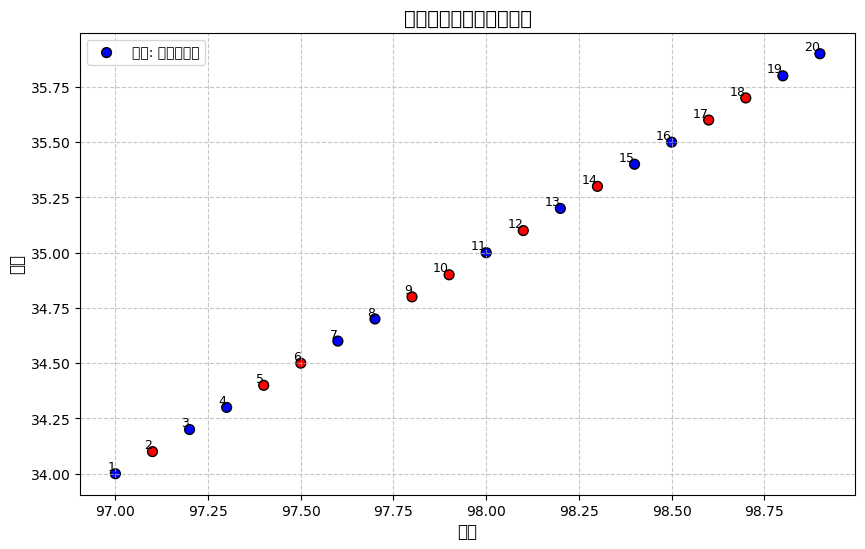

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
# 20个用户的经纬度和是否被服务 (纬度, 经度, 是否被服务)
user_data = np.array([
    [34.0, 97.0, 1],
    [34.1, 97.1, 0],
    [34.2, 97.2, 1],
    [34.3, 97.3, 1],
    [34.4, 97.4, 0],
    [34.5, 97.5, 0],
    [34.6, 97.6, 1],
    [34.7, 97.7, 1],
    [34.8, 97.8, 0],
    [34.9, 97.9, 0],
    [35.0, 98.0, 1],
    [35.1, 98.1, 0],
    [35.2, 98.2, 1],
    [35.3, 98.3, 0],
    [35.4, 98.4, 1],
    [35.5, 98.5, 1],
    [35.6, 98.6, 0],
    [35.7, 98.7, 0],
    [35.8, 98.8, 1],
    [35.9, 98.9, 1],
])

# 分离数据
latitudes = user_data[:, 0]  # 纬度
longitudes = user_data[:, 1]  # 经度
is_served = user_data[:, 2]  # 服务标志
user_ids = np.arange(1, len(user_data) + 1)  # 生成用户ID：1到20
# 设置颜色：被服务为蓝色，未被服务为红色
colors = ['blue' if served == 1 else 'red' for served in is_served]

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=colors, s=50, edgecolors='black', label='用户点')
for i, user_id in enumerate(user_ids):
    plt.text(longitudes[i], latitudes[i], f'{user_id}', fontsize=9, ha='right', va='bottom', color='black')
# 添加图例和标注
plt.title('用户分布及卫星服务状态', fontsize=14)
plt.xlabel('经度', fontsize=12)
plt.ylabel('纬度', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['蓝色: 被卫星服务', '红色: 未被卫星服务'], loc='upper left')
plt.show()


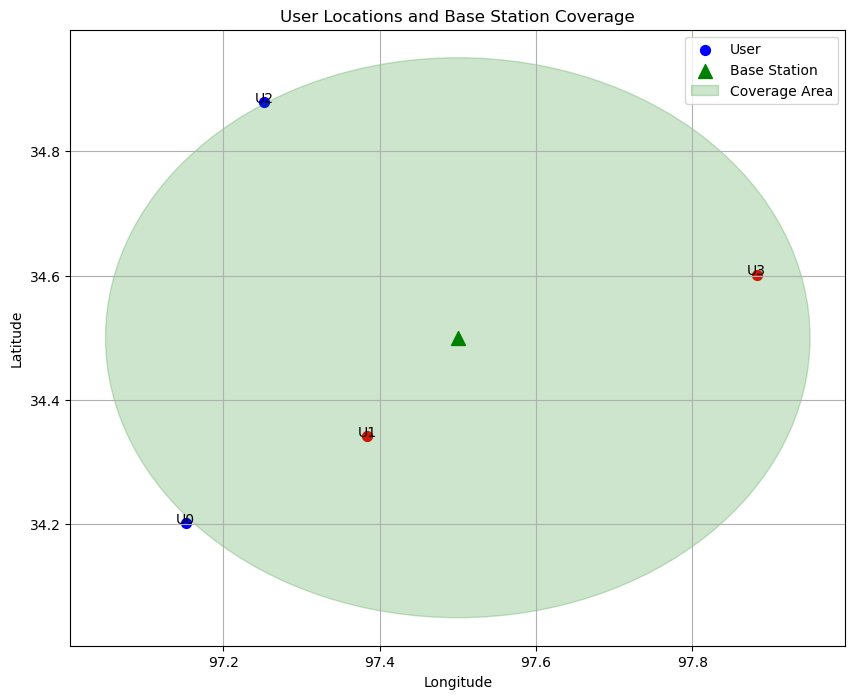

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.basemap import Basemap  # 如果需要地理背景，可以使用 Basemap（可选）
import numpy as np

# 用户经纬度和服务情况
user_data = np.array([
    [34.201392, 97.152038, 1],  # [纬度, 经度, 服务状态]
    [34.342046, 97.383979, 0],
    [34.879392, 97.252038, 1],
    [34.601392, 97.882038, 0]
])
user_ids = np.arange(len(user_data))  # 用户ID

# 基站数据
base_latitude = 34.5
base_longitude = 97.5
radius = 50  # 覆盖范围（公里）

# 创建图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制用户点
for i, (lat, lon, served) in enumerate(user_data):
    color = 'blue' if served else 'red'
    ax.scatter(lon, lat, c=color, label='User' if i == 0 else "", s=50)
    ax.text(lon, lat, f"U{i}", fontsize=10, ha='center')

# 绘制基站位置
ax.scatter(base_longitude, base_latitude, c='green', label='Base Station', s=100, marker='^')

# 绘制基站覆盖范围（简单地假设地球是平面）
circle = Circle((base_longitude, base_latitude), radius / 111, color='green', alpha=0.2, label='Coverage Area')
ax.add_patch(circle)

# 设置图例和轴标签
ax.legend(loc='upper right')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('User Locations and Base Station Coverage')
ax.grid(True)

# 显示图像
plt.show()
